In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/Probability PPTs/Advanced Hypothesis Testing /two_way_anova.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Probability PPTs/Hypothesis Testing -4/aerofit.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Probability PPTs/Advanced Hypothesis Testing /ab_test_data.csv")

In [3]:
df1.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


## Two Way Anove

- Main Effect
  - Flavor
    - HO: The avg sales across various flavours are the same.(The flavour of the product is not impacting the sales.)
    - H1: The avg sales across various flavours are different.(The flavour of the product is impacting the sales.)
  - Location
    - HO: The avg sales across various locations are the same.(The location of the product is not impacting the sales.)
    - H1: The avg sales across various locations are different.(The location of the product is impacting the sales.)
- Interaction Effect
  - H0: The avg sales acorss various location and the flavours are the same. (The flavour and the location of the product is not impacting the sales.)
  - H1: The avg sales acorss various location and the flavours are different. (The flavour and the location of the product is impacting the sales.)

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

test = ols('Sales~C(Flavour)*C(Location)', data =df1).fit()

sm.stats.anova_lm(test, typ = 2)

,sum_sq,df,F,PR(>F)
C(Flavour),6919.558981,2.0,1.968465,0.145773
C(Location),2059.273884,3.0,0.390546,0.760092
C(Flavour):C(Location),11802.257765,6.0,1.119163,0.357804
Residual,154669.016331,88.0,NaN,NaN


- alpha: 0.05
- Flavor:
  - p-value: 0.14 > alpha. P is high null will fly. We fail to reject null.
  - The avg sales acorss various location are the same.

- Location:
  - p-value: 0.76 > alpha. P is high, null will fly. We fail to reject null.
  - The avg sales acorss various location are the same.

- Location and Flavour:
  - p-value: 0.35 > alpha. P is high null will fly. We failt to reject null.
  - The avg sales across various location and flavours are the same.

In [9]:
# recovery times of patients who took medicine-1
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

# recovery times of patietnts who took medicine-2
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]



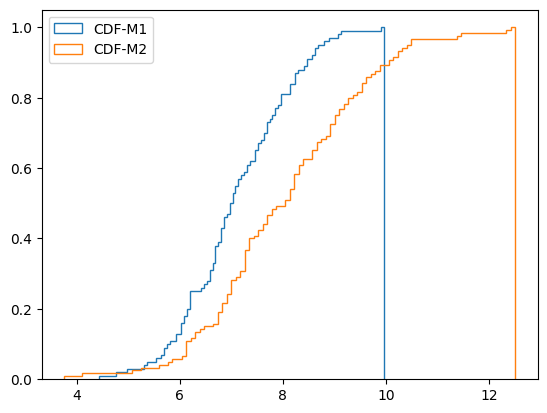

In [12]:
plt.hist(r1, cumulative = True, bins = 100, density = True, histtype = 'step', label = 'CDF-M1')
plt.hist(r2, cumulative = True, bins = 100, density = True, histtype = 'step', label = 'CDF-M2')
plt.legend()
plt.show()


In [14]:
from scipy.stats import kstest

# HO: Both are same
# H1: They are different
kstest(r1, r2)

KstestResult(statistic=0.3233333333333333, pvalue=1.516338798228849e-05, statistic_location=8.16787232, statistic_sign=1)

- alpha: 0.05
- p value is low, null will go. We reject null
- The two series are not the same.


In [15]:
data1 = [ 4.96714153,  1.38264301,  6.47688538, 15.23029856,  2.34153375,
        2.34136957, 15.79212816,  7.67434729,  4.69474386,  5.42560044,
        4.63417693,  4.65729754,  2.41962272, 19.13280245, 17.24917833,
        5.62287529, 10.1283112 ,  3.14247333,  9.08024076, 14.12303701,
       14.65648769,  2.257763  ,  0.67528205, 14.24748186,  5.44382725,
        1.1092259 , 11.50993577,  3.75698018,  6.0063869 ,  2.9169375 ,
        6.01706612, 18.52278185,  0.13497225, 10.57710929,  8.22544912,
       12.2084365 ,  2.08863595, 19.59670124, 13.28186049,  1.96861236,
        7.3846658 ,  1.71368281,  1.15648282,  3.01103696, 14.7852199 ,
        7.19844208,  4.60638771, 10.57122226,  3.4361829 , 17.63040155,
        3.24083969,  3.8508228 ,  6.76922   ,  6.11676289, 10.30999522,
        9.31280119,  8.39217523,  3.09212376,  3.31263431,  9.75545127,
        4.79174238,  1.85658977, 11.06334974, 11.96206624,  8.12525822,
       13.56240029,  0.72010122, 10.03532898,  3.61636025,  6.45119755,
        3.61395606, 15.38036566,  0.35826039, 15.64643656, 26.19745104,
        8.21902504,  0.87047068,  2.9900735 ,  0.91760777, 19.87568915,
        2.19671888,  3.57112572, 14.77894045,  5.18270218,  8.08493603,
        5.01757044,  9.15402118,  3.2875111 ,  5.29760204,  5.13267433,
        0.97077549,  9.68644991,  7.02053094,  3.27662147,  3.92108153,
       14.63514948,  2.96120277,  2.61055272,  0.05113457,  2.34587133]

data2 = [14.15370742,  4.20645323,  3.42714517,  8.02277269,  1.61285712,
        4.04050857, 18.86185901,  1.74577813,  2.57550391,  0.74445916,
       19.18771215,  0.26513875,  0.6023021 , 24.63242112,  1.92360965,
        3.01547342,  0.3471177 , 11.68678038, 11.42822815,  7.51933033,
        7.91031947,  9.09387455, 14.02794311, 14.01851063,  5.86857094,
       21.90455626,  9.90536325,  5.6629773 ,  0.99651365,  5.03475654,
       15.50663431,  0.68562975, 10.62303714,  4.73592431,  9.19424234,
       15.49934405,  7.83253292,  3.22061516,  8.13517217, 12.30864316,
        2.27459935, 13.07142754, 16.07483235,  1.84633859,  2.59882794,
        7.81822872, 12.36950711, 13.20456613,  5.21941566,  2.96984673,
        2.5049285 ,  3.46448209,  6.80024722,  2.32253697,  2.93072473,
        7.14351418, 18.65774511,  4.73832921, 11.91303497,  6.56553609,
        9.7468167 ,  7.87084604, 11.58595579,  8.20682318,  9.63376129,
        4.12780927,  8.2206016 , 18.96792983,  2.45388116,  7.53736164,
        8.8951443 ,  8.15810285,  0.77101709,  3.41151975,  2.76690799,
        8.27183249,  0.13001892, 14.53534077,  2.64656833, 27.20169167,
        6.25667348,  8.57157556, 10.70892498,  4.82472415,  2.23462785,
        7.14000494,  4.73237625,  0.72828913,  8.46793718, 15.14847225,
        4.46514952,  8.56398794,  2.14093744, 12.45738779,  1.73180926,
        3.8531738 ,  8.83857436,  1.53725106,  0.58208718, 11.42970298,
        3.5778736 ,  5.60784526, 10.83051243, 10.53802052, 13.77669368,
        9.3782504 ,  5.15035267,  5.13785951,  5.15047686, 38.52731491,
        5.70890511, 11.3556564 ,  9.54001763,  6.51391251,  3.15269245,
        7.5896922 ,  7.72825215,  2.36818607,  4.85363548,  0.81874139]

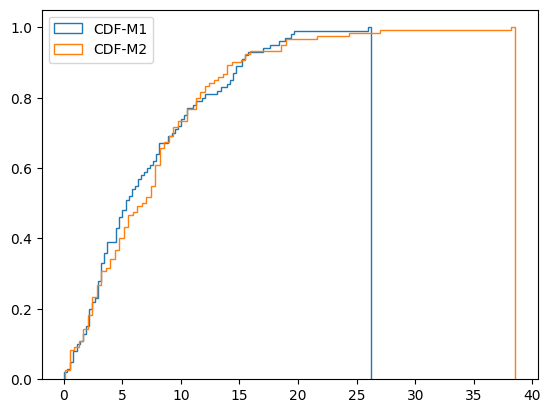

In [16]:
plt.hist(data1, cumulative = True, bins = 100, density = True, histtype = 'step', label = 'CDF-M1')
plt.hist(data2, cumulative = True, bins = 100, density = True, histtype = 'step', label = 'CDF-M2')
plt.legend()
plt.show()

In [19]:
from scipy.stats import kstest

# HO: Both are same
# H1: They are different
kstest( data2, data1)

KstestResult(statistic=0.095, pvalue=0.671374753605883, statistic_location=6.47688538, statistic_sign=-1)

- alpha: 0.05
- p is hight, null will fly. We fail to reject null.
- They are same.

## YouTube

- Youtube wants to test if they should stick with one ad or they should roll two two ads for a video?


In [20]:
df3.head()

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control


- HO: The avg watch hour is the same for both control and treatment group. (If same they can roll out the new feature which means they can show two ads in a video)
- H1: They are different (If they are different let's test if the avg watch hour going up or down)

In [21]:
c = df3[df3['customer_segmnt'] =='control']['watch_time_hrs']
t = df3[df3['customer_segmnt'] =='treatment']['watch_time_hrs']

In [22]:
from scipy.stats import ttest_ind
ttest_ind(c,t)

TtestResult(statistic=15.96034913022092, pvalue=5.438408586231319e-57, df=19958.0)

- alpha: 0.05
- p value is low, null will go. We reject null. They are different

In [23]:
c.mean()

3.6099602285795678

In [24]:
t.mean()

3.0542936797350437

In [25]:
# H0: The avg watch hour for control group is same as for treatment group
# H1: The avg watch hour for control group is greater than for treatment group
ttest_ind(c, t, alternative = 'greater')

TtestResult(statistic=15.96034913022092, pvalue=2.719204293115659e-57, df=19958.0)

- alpha: 0.05
- p-value is low, null will go.
- The avg watch hour for control group is higher than treatment group which basically means that the two ads in a video is resulting in the drop of the watch hour and is not a good idea to implement the same.